In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [7]:
ad = pd.read_csv('data/adMeans.txt', header=None)
#ad.rename(columns={0 : 'freq'}, inplace=True)
game = pd.read_csv('data/gameMeans.txt', header=None)
#game.rename(columns={0 : 'freq'}, inplace=True)
ad['classification'] = 'ad'
game['classification'] = 'game'
all_points = pd.concat([ad, game])
all_points.rename(columns={0 : 'freq', 1 : 'var', 2 : 'sd', 3: 'range'}, inplace=True)
all_points.head()

,freq,var,sd,range,classification
0,22.942580,168459.778102,410.438519,17091.609373,ad
1,1.228899,22.750735,4.769773,75.338726,ad
2,1.908989,497.001076,22.293521,741.969657,ad
3,2.052158,1147.599216,33.876234,899.127118,ad
4,0.018974,0.346669,0.588786,26.294685,ad


In [15]:
all_points.describe()

,freq,var,sd,range
count,192628.000000,1.926280e+05,192628.000000,192628.000000
mean,10.225498,1.031620e+05,104.079024,3291.619272
std,25.346085,9.299238e+05,303.858590,10958.351173
min,0.000004,2.325731e-10,0.000015,0.000254
25%,1.315111,1.154997e+02,10.747079,266.192518
50%,2.672179,7.116868e+02,26.677458,771.264343
75%,8.168241,5.359230e+03,73.206764,2175.480697
max,290.701819,8.633337e+07,9291.575465,418029.999961


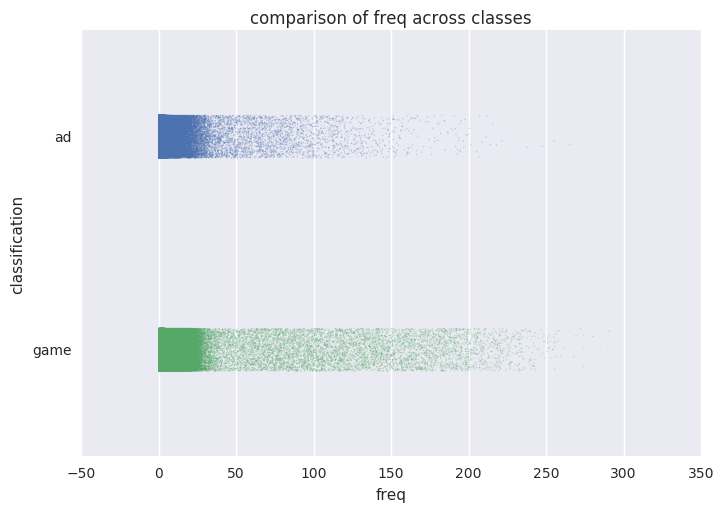

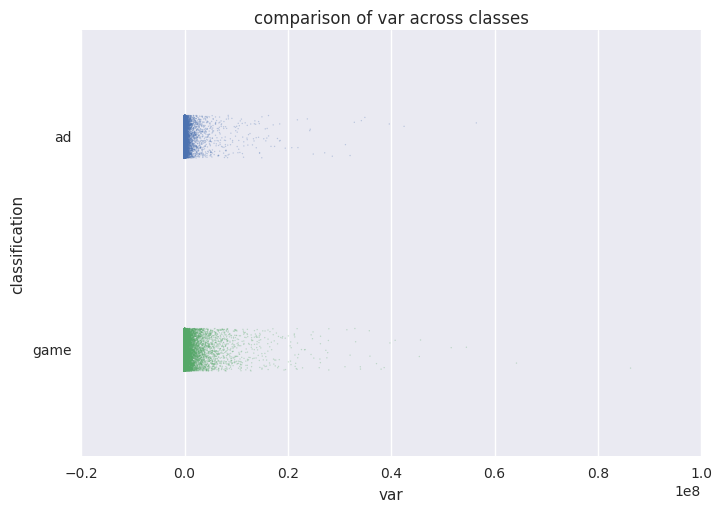

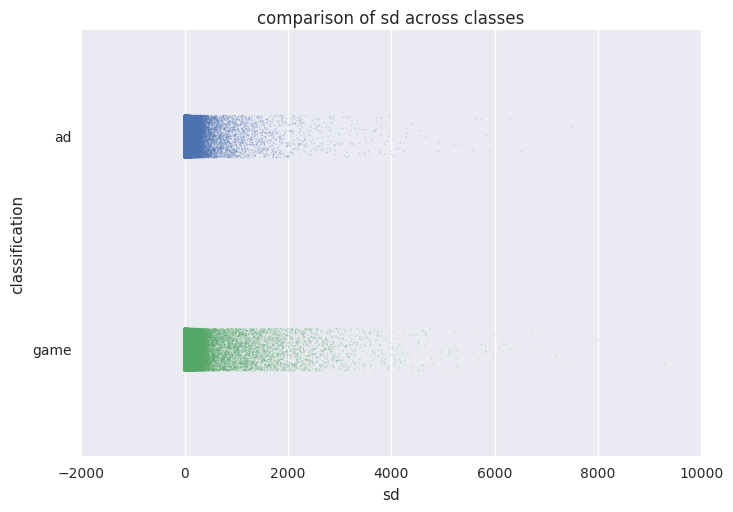

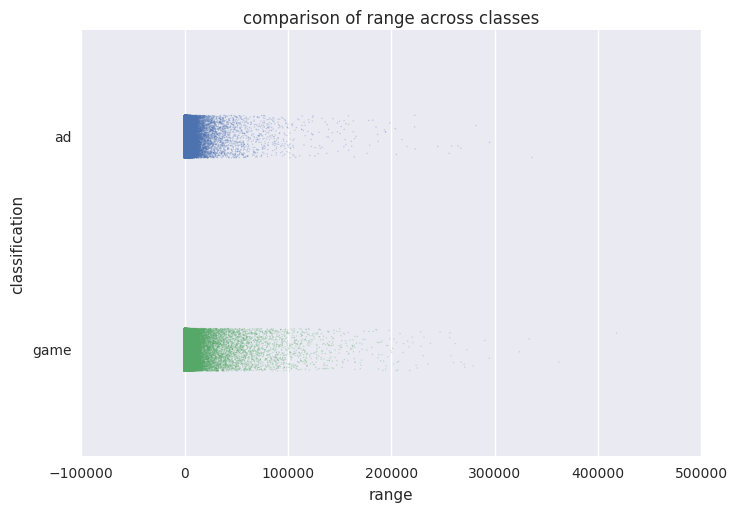

In [8]:
for measure in ['freq', 'var', 'sd', 'range']:
    sns.stripplot(data=all_points, x=measure, y="classification", jitter=True, size=1, alpha=0.3)
    plt.title("comparison of %s across classes" % measure)
    #plt.xlim([0, 50])
    plt.show()

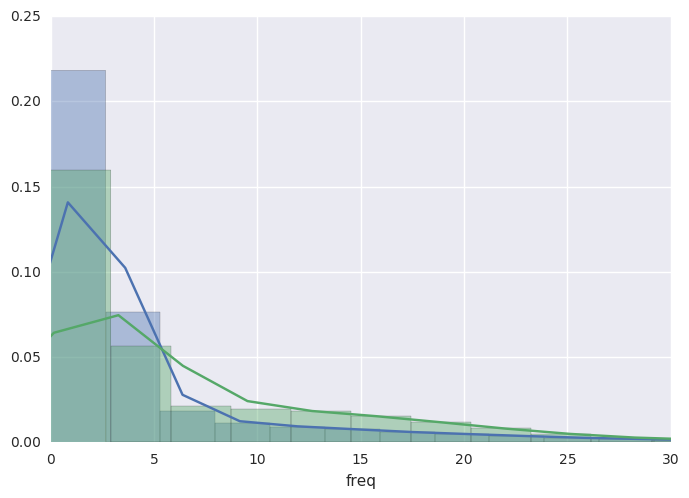

In [9]:
sns.distplot(all_points[ all_points['classification'] == 'ad' ]['freq'], bins=100)
sns.distplot(all_points[ all_points['classification'] == 'game' ]['freq'], bins=100)

plt.xlim([0, 30])
plt.show()

A decent next step would be to normalize each signal and then take a variety of summary calculations like median, standard deviation etc and see if that helps separate the data a bit

In [31]:
ad = pd.read_csv('data/adMeans-normalized.txt', header=None)
#ad.rename(columns={0 : 'freq'}, inplace=True)
game = pd.read_csv('data/gameMeans-normalized.txt', header=None)
#game.rename(columns={0 : 'freq'}, inplace=True)
ad['classification'] = 'ad'
game['classification'] = 'game'
all_points = pd.concat([ad, game])
all_points.rename(columns={0 : 'mean', 1 : 'range', 2 : 'morethan2', 3: 'morethan3'}, inplace=True)
all_points.describe()

,mean,range,morethan2,morethan3
count,1.926280e+05,192628.000000,192628.000000,192628.000000
mean,-2.175961e-17,28.802975,25.129130,16.826718
std,4.620949e-16,8.019713,16.392356,10.270843
min,-7.696101e-15,7.543934,1.000000,1.000000
25%,-1.711244e-16,22.590679,12.000000,9.000000
50%,-6.166400e-18,28.434128,21.000000,14.000000
75%,1.511954e-16,34.848693,35.000000,23.000000
max,7.498342e-15,45.265897,125.000000,74.000000


In [ ]:
sns.stripplot(data=all_points, x="morethan2", y="classification", jitter=True, size=1, alpha=0.3)
plt.title("comparison of range across classes")
#plt.xlim([-7.696101e-15, 7.498342e-15])
plt.show()